* **Setup**

In [1]:
import sys, os
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

* **Import utils**

In [2]:
from pretrained.predictor import SingleKModel, MultiKModel, OneTestKModel, BatchSingleKModel
import metrics

2025-11-05 12:47:46.036393: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 12:47:46.131593: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 12:47:50.695214: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 12:48:11.108884: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [3]:
# nano  ~/.keras/keras.json
# {
#     "floatx": "float32",
#     "epsilon": 1e-07,
#     "backend": "tensorflow",
#     "image_data_format": "channels_last"
# }

* **Predict**

1- Using single K Model

In [4]:
kmodel = SingleKModel(kmer_size=2)
kmodel.load("../data/testset-full/k2/testset.csv", format="csv", type='kmer_file')
genboard = kmodel.predict()

E0000 00:00:1762343323.555328  147522 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1762343323.605518  147522 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Predicting: 100%|██████████| 58/58 [04:15<00:00,  4.40s/it]


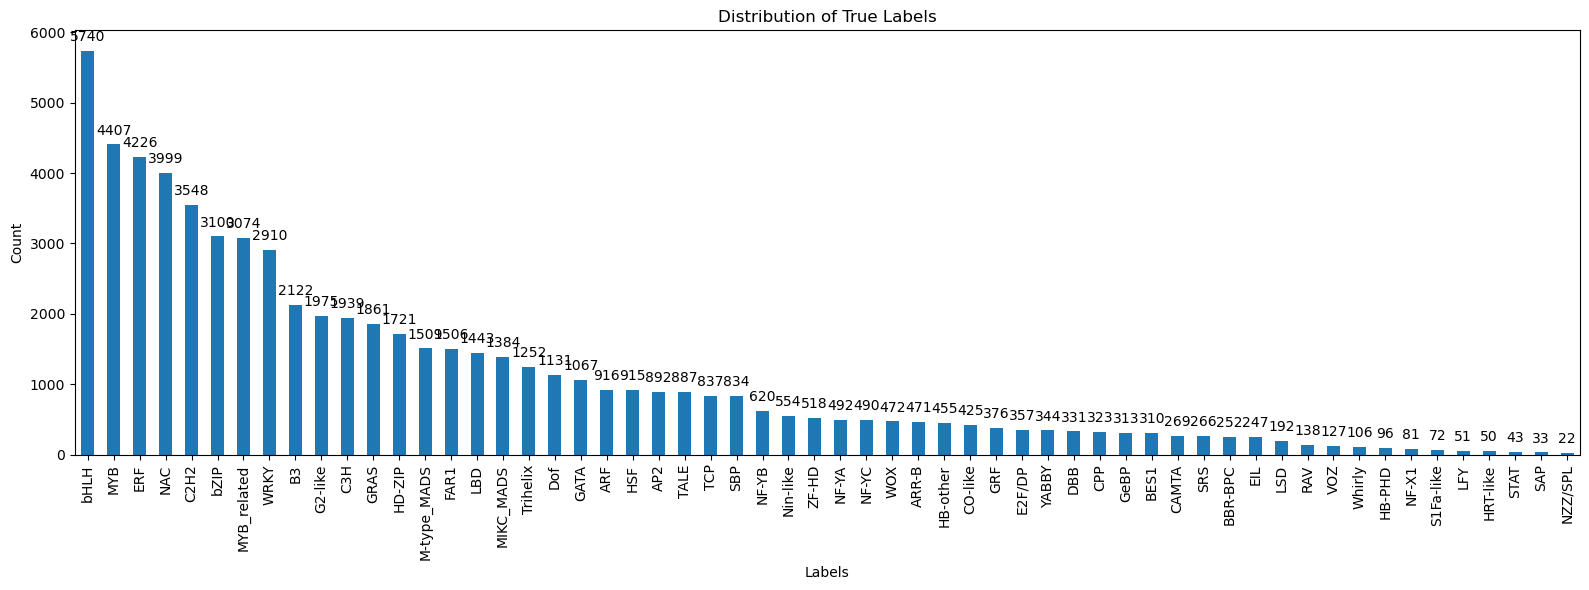

In [5]:
metrics.plot_testset(true_label_df_path="../data/testset-full/k2/true_labels.csv", class_mapping_df_path="../data/testset-full/k2/class_mapping.json")

In [5]:
genboard.display()

<!--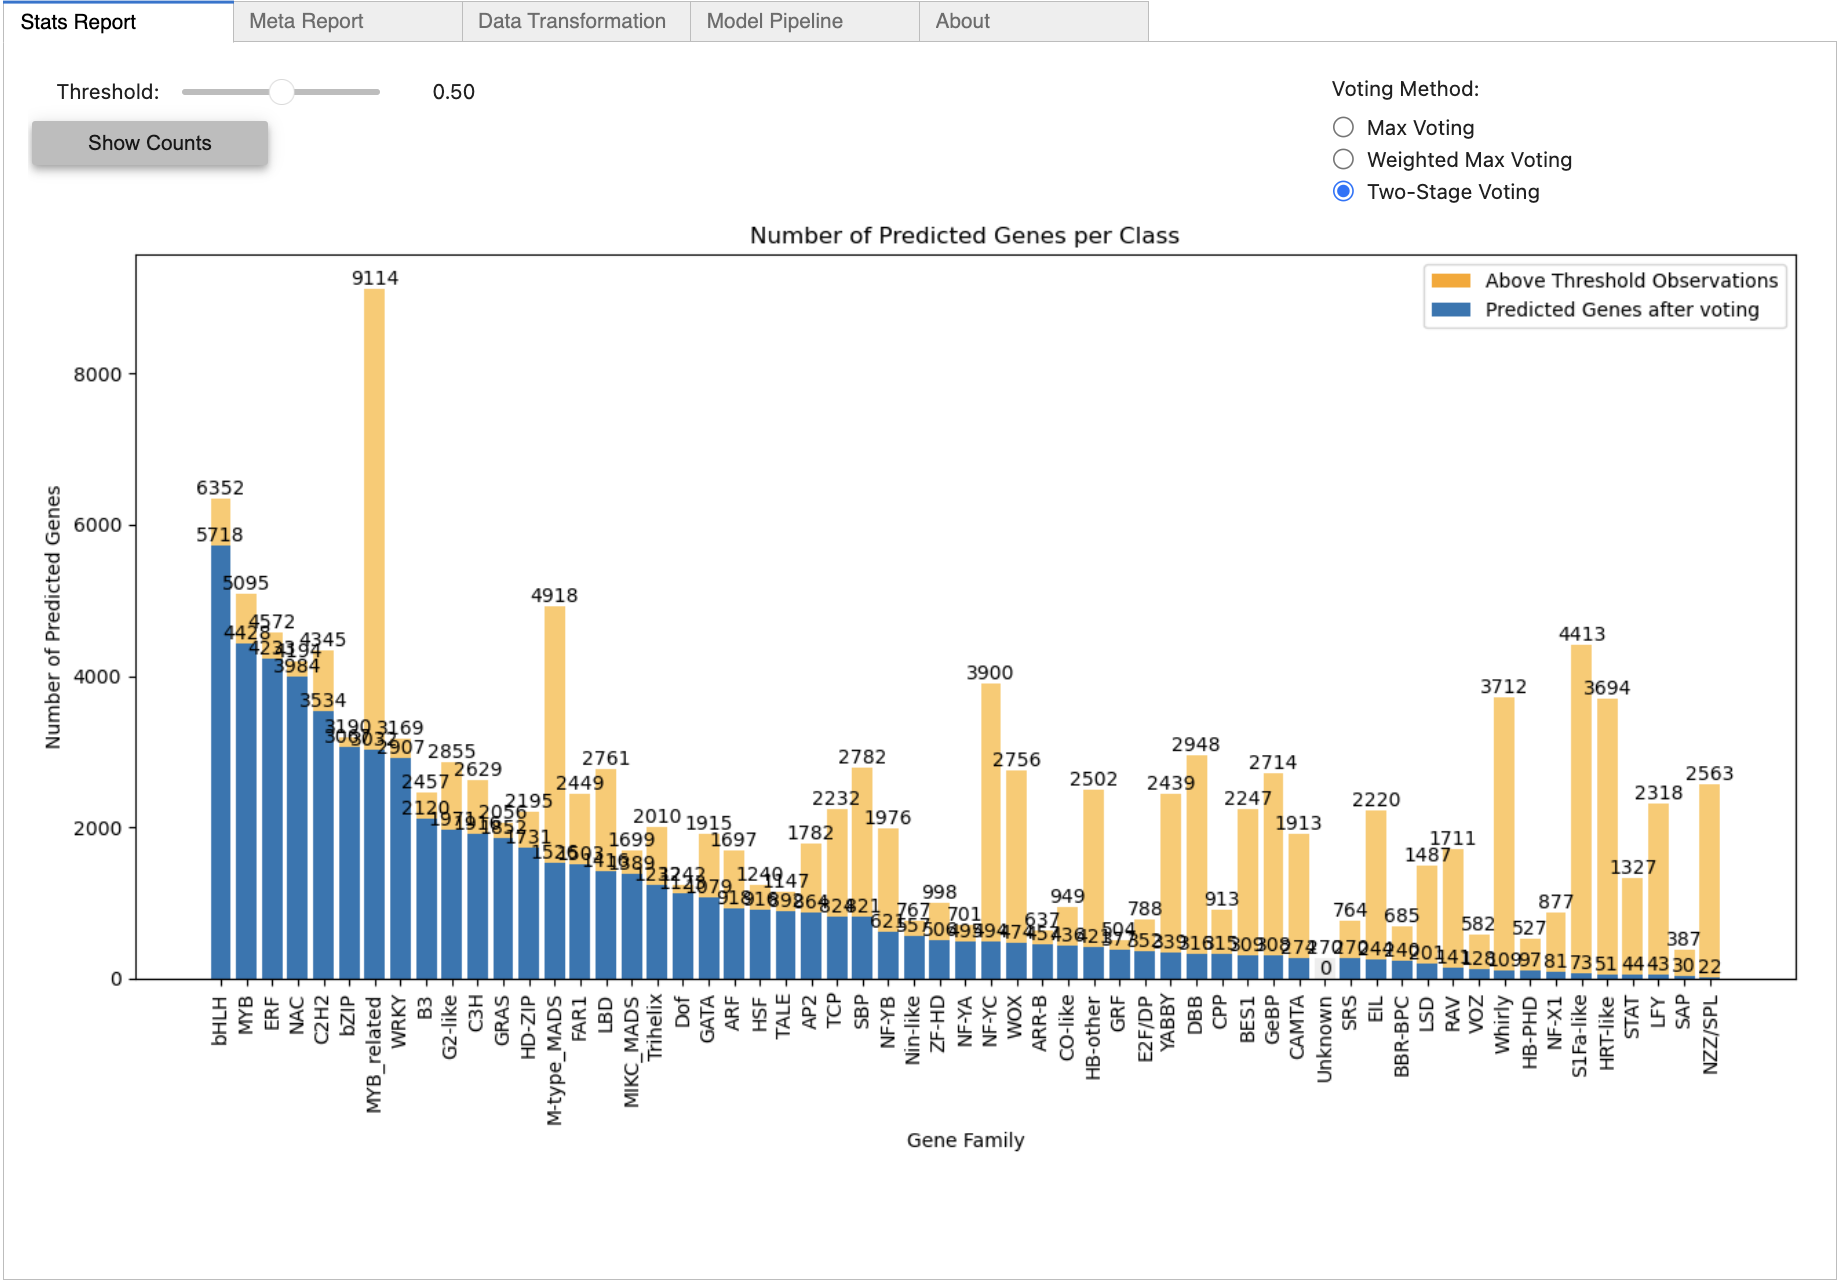

In [18]:
genboard.prediction.shape

(64091, 58)

In [19]:
genboard.prediction

,AP2,ARF,ARR-B,B3,BBR-BPC,BES1,C2H2,C3H,CAMTA,CO-like,...,TCP,Trihelix,VOZ,WOX,WRKY,Whirly,YABBY,ZF-HD,bHLH,bZIP
0,0.000113,0.000026,0.000416,0.000019,0.000177,0.011020,6.036264e-06,0.000994,0.000006,0.000230,...,0.002616,0.000135,0.001380,0.013322,2.045848e-08,0.001595,0.007586,0.002011,5.536214e-07,1.177008e-05
1,0.001129,0.000005,0.000072,0.000013,0.000039,0.010827,1.480682e-05,0.000163,0.000002,0.000046,...,0.002495,0.002121,0.000213,0.010250,8.420818e-11,0.016850,0.004521,0.000736,1.392895e-08,2.007570e-07
2,0.000004,0.000001,0.000006,0.001043,0.000389,0.002728,9.083821e-08,0.000531,0.000005,0.000029,...,0.003109,0.000508,0.000241,0.033367,2.230675e-09,0.002318,0.004181,0.002501,2.919220e-06,1.024067e-05
3,0.000113,0.000122,0.001037,0.000130,0.000079,0.001150,6.309211e-04,0.006621,0.000003,0.000038,...,0.010030,0.000363,0.000321,0.004103,4.037717e-08,0.001197,0.003993,0.001674,1.188527e-07,8.465186e-07
4,0.000349,0.000008,0.000495,0.000017,0.000163,0.010449,5.230157e-06,0.006035,0.000044,0.000017,...,0.001277,0.000976,0.000906,0.013391,2.268244e-11,0.001697,0.005031,0.003975,5.275675e-08,2.820634e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64086,0.000567,0.437858,0.124366,0.688312,0.000289,0.348606,1.921367e-03,0.013008,0.010609,0.000084,...,0.017955,0.002969,0.005504,0.005478,2.717885e-05,0.029612,0.005394,0.065615,4.841352e-07,2.776248e-05
64087,0.002969,0.102892,0.037025,0.331735,0.000462,0.092718,8.828937e-05,0.001612,0.087591,0.000096,...,0.076543,0.016255,0.001990,0.005932,3.216585e-05,0.215349,0.007216,0.267138,9.451765e-06,9.155519e-05
64088,0.134475,0.006503,0.036019,0.000301,0.000197,0.001639,5.947250e-06,0.304725,0.008169,0.000051,...,0.016368,0.564051,0.009375,0.001336,1.364094e-13,0.029775,0.029474,0.016547,4.706410e-06,5.052274e-07
64089,0.001675,0.276718,0.004089,0.109287,0.000166,0.135424,1.022456e-03,0.014623,0.021271,0.000248,...,0.178663,0.006388,0.001251,0.005541,1.582568e-05,0.072845,0.004623,0.113945,9.634238e-08,1.758618e-04


* **Confusion report for validation**

In [7]:
import json
import pandas as pd

true_label = pd.read_csv('../data/testset-full/k2/true_labels.csv')['true_label'].values
with open('../data/testset-full/k2/class_mapping.json', 'r') as json_file:
    class_mapping = json.load(json_file)
#class_mapping['Unknown'] = 0

In [8]:
# genboard.show_eval_metric(
#     true_label=true_label,
#     class_mapping_rules=class_mapping,
#     voting_method="Two-Stage Voting", #Two-Stage Voting 
#     voting_threshold=0.5,
#     binary_class_threshold=0.5,
#     components=['confusion_matrix', 'general_accuracy', 'accuracy_per_family'],
#     #metrics_storage_path="./metrics/"
# )

In [9]:
# import importlib
# import pretrained
# importlib.reload(pretrained.predictor)

In [20]:
# genboard.show_roc_curve(
#     true_label=true_label,
#     class_mapping_rules=class_mapping,
#     voting_method="Two-Stage Voting",#"Max Voting",# "Two-Stage Voting"
#     voting_threshold=0.5,
#     save_path="results/roc_curve_k3.png"
# )

genboard.compute_and_save_roc_per_family(
    true_label=true_label,
    class_mapping_rules=class_mapping,
    voting_method="Max Voting",#"Max Voting"
    voting_threshold=0.0,
    save_folder="results/maxvoting/k2"
)


✅ Saved ROC data and plots for k=2 → results/maxvoting/k2


In [21]:
genboard.compute_and_save_roc_per_family(
    true_label=true_label,
    class_mapping_rules=class_mapping,
    voting_method="Two-Stage Voting",#"Max Voting"
    voting_threshold=0.0,
    save_folder="results/2ndvoting/k2"
)


✅ Saved ROC data and plots for k=2 → results/2ndvoting/k2


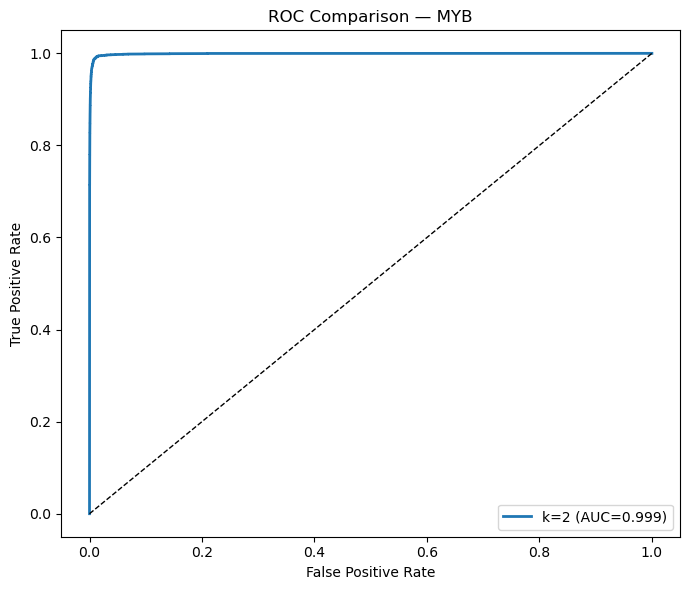

In [24]:
genboard.compare_roc_across_k(
    family_name="MYB",
    roc_folders=["results/maxvoting/k2",],# "results/k4", "results/k5"],
    save_path="results/maxvoting/compare_MYB.png"
)